In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def midsquare(val, n=4):
    return int(str(val ** 2).zfill(2 * n)[n // 2:-n // 2])

seed = 5497
seq = [seed]
for i in range(100):
    seq.append(midsquare(seq[i]))

def rng(m=2 ** 32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

samples = [rng() for _ in range(1000)]

Task 4

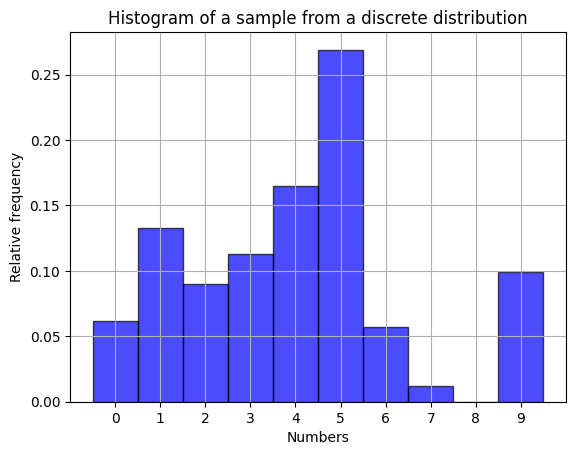

In [10]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()

cdf = np.cumsum(weights)

random_numbers = np.random.rand(sample_size := 1000)

sample = np.searchsorted(cdf, random_numbers)

plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Numbers')
plt.ylabel('Relative frequency')
plt.title('Histogram of a sample from a discrete distribution')
plt.grid()
plt.show()

Task 5

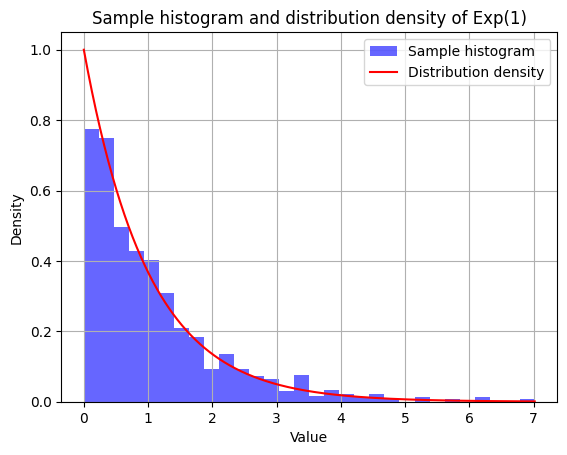

In [11]:
lambda_param, n = 1.0, 1000
U = np.random.uniform(0, 1, n)
X = -np.log(1 - U) / lambda_param

plt.hist(X, bins=30, density=True, alpha=0.6, color='b', label='Sample histogram')

x = np.linspace(0, np.max(X), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r', label='Distribution density')

plt.title('Sample histogram and distribution density of Exp(1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

Task 6

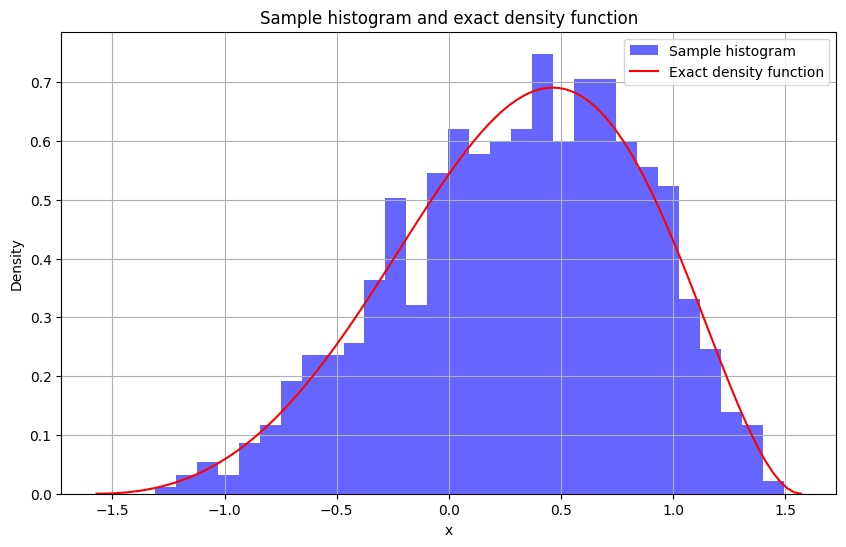

Number of accepted samples: 1000


In [12]:
target_density = lambda x: np.exp(x) * (np.cos(x) ** 2)
proporsal_density = 1 / np.pi
n_samples, samples, accepted = 1000, [], 0
c = np.max(target_density(np.linspace(-np.pi / 2, np.pi / 2, 1000))) / (1 / np.pi)

while accepted < n_samples:
    x, y = np.random.uniform(-np.pi / 2, np.pi / 2), np.random.uniform(0, c * proporsal_density)
    if y < target_density(x):
        accepted += 1
        samples.append(x)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Sample histogram')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = target_density(x) / np.trapezoid(target_density(x), x)
plt.plot(x, density, 'r', label='Exact density function')

plt.title('Sample histogram and exact density function')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

print('Number of accepted samples:', accepted)


Task 7

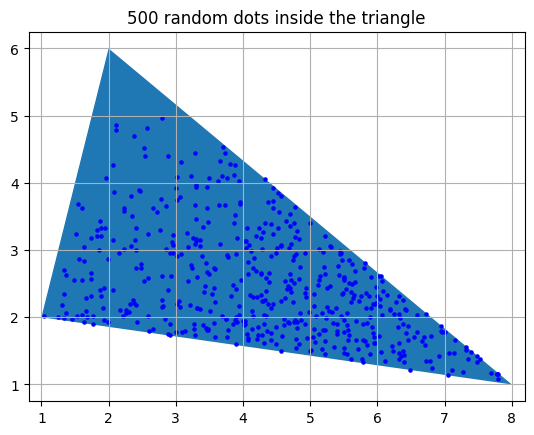

In [13]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def generate_points_in_triangle(vertices, num_points):
    r1, r2 = np.sqrt(np.random.rand(num_points)), np.sqrt(np.random.rand(num_points))
    return (1 - r1)[:, np.newaxis] * vertices[0] + (r1 * (1 - r2))[:, np.newaxis] * vertices[1] + (r1 * r2)[:, np.newaxis] * vertices[2]

vertices = np.array([[1, 2], [2, 6], [8, 1]])
num_points = 500
points = generate_points_in_triangle(vertices, num_points)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
polygon = Polygon(vertices, closed=True, fill=None, edgecolor='black')
plt.gca().add_collection(PatchCollection([polygon]))

plt.scatter(points[:, 0], points[:, 1], color='blue', s=5)

plt.xlim(0, 9)
plt.ylim(0, 7)
plt.axis('equal')
plt.title('500 random dots inside the triangle')
plt.grid()
plt.show()

Task 8

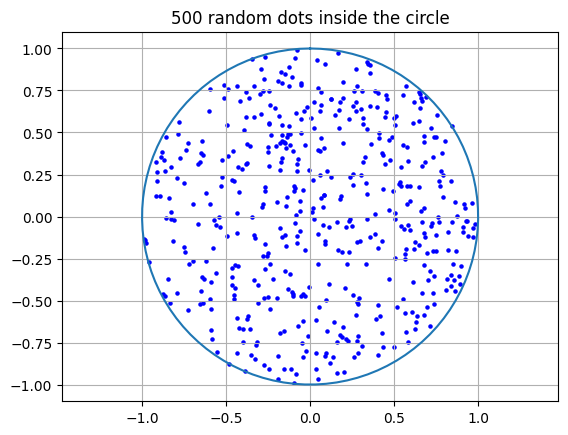

In [14]:
num_points = 500

angles, radius = np.random.uniform(0, 2 * np.pi, num_points), np.sqrt(np.random.uniform(0, 1, num_points))
x, y = radius * np.cos(angles), radius * np.sin(angles)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))

plt.scatter(x, y, color='blue', s=5)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axis('equal')
plt.title('500 random dots inside the circle')
plt.grid()
plt.show()

Task 9

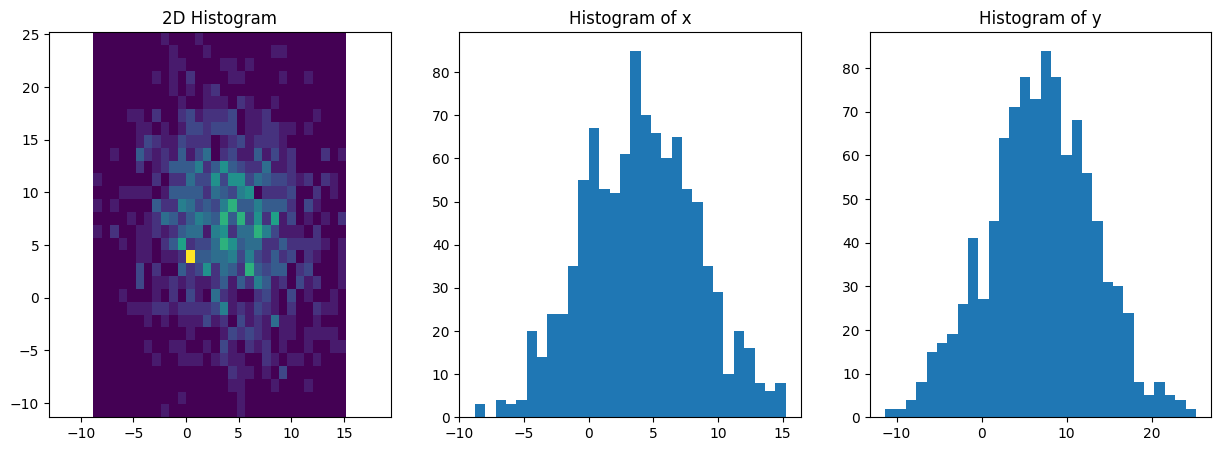

Sample mean: [3.99596848 6.91599412]
Exact mean: [4 7]
Sample covariance matrix:
 [[18.89579632 -4.13890368]
 [-4.13890368 39.07769597]]
Exact covariance matrix:
 [[20 -4]
 [-4 40]]


In [15]:
def box_muller_no_trig(n):
    tmp = np.zeros((2, n))
    for i in range(n):
        while True:
            x, y = 2 * np.random.rand(2) - 1
            r = x**2 + y**2
            if 0 < r < 1:
                break
        factor = np.sqrt(-2 * np.log(r) / r)

        tmp[:, i] = np.array([x, y]) * factor
    return tmp[0], tmp[1]

n = 1000
mean = np.array([4, 7])
cov = np.array([[20, -4], [-4, 40]])
z0, z1 = box_muller_no_trig(n)

z = np.vstack((z0, z1)).T
samples = mean + z @ np.linalg.cholesky(cov).T

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(samples[:, 0], samples[:, 1], bins=30)
ax[0].axis('equal')
ax[1].hist(samples[:, 0], bins=30)
ax[2].hist(samples[:, 1], bins=30)
ax[0].set_title("2D Histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples.T)

print("Sample mean:", sample_mean)
print("Exact mean:", mean)
print("Sample covariance matrix:\n", sample_cov)
print("Exact covariance matrix:\n", cov)